In [11]:
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/
import numpy
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [12]:
# Initialize Random Number Generator
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [13]:
# load dataset

dataframe = pandas.read_csv("normalAndNeptune.csv")#, header=True) 

# samples 10000 random data points from 500k
dataframe = dataframe.sample(n=50000)
# LabelEncoder, turns all our categorical data into integers
le = LabelEncoder()

# apply "le.fit_transform" to every column (usually only works on 1 column)
dataframe_encoded = dataframe.apply(le.fit_transform)
attack_labels = le.classes_
dataset = dataframe_encoded.values

#Set X as our input data and Y as our label
X = dataset[:,0:41].astype(float)
Y = dataset[:,41]


In [14]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# print(dummy_y)
#print(len(dummy_y[0]))
num_of_classes = len(dummy_y[0])  # the length of dummy y is the number of classes we have in our small sample
# since we are randomly sampling from a large dataset, we might not get 1 of every class in our sample
# we need to set output layer to be equal to the length of our dummy_y vectors
print(num_of_classes)


2


In [15]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    
    inputs = 41
    hidden_layer1 = 10
    hidden_layer2 = 5
    hidden_layer3 = 0
    outputs = num_of_classes  #needs to be this variable in case we forget to sample. Could end up having 10 classes or 12, etc
    
    model.add(Dense(hidden_layer1, input_dim=inputs, activation='relu'))
    if hidden_layer2 != 0:
        model.add(Dense(hidden_layer2, activation='relu'))
    if hidden_layer3 != 0:
        model.add(Dense(hidden_layer3, activation='relu'))
    model.add(Dense(outputs, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #optimizer=adam
    return model

In [16]:
#for i in range(0,10):
estimator = KerasClassifier(build_fn=baseline_model, epochs=32, batch_size=200, verbose=2)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
y_pred = cross_val_predict(estimator, X, dummy_y, cv=kfold)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

trained_classifier = estimator.fit(X, Y)
print(type(estimator))

cm = confusion_matrix(Y, y_pred)
print(cm)
print("total: " + str(cm.sum()))
print("accuracy: " + str(numpy.trace(cm) / cm.sum()))
print("Matthews correlation coefficient: " + str(matthews_corrcoef(Y, y_pred)))



print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

f = open("discriminatorResults.txt", "a+")
f.write("TP: %d, FP: %d, FN: %d, TN: %d\n" % (cm[0][0], cm[0][1], cm[1][0], cm[1][1]))
f.close()


Epoch 1/32
 - 1s - loss: 2.4195 - acc: 0.8282
Epoch 2/32
 - 0s - loss: 0.0339 - acc: 0.9914
Epoch 3/32
 - 0s - loss: 0.0184 - acc: 0.9990
Epoch 4/32
 - 0s - loss: 0.0143 - acc: 0.9996
Epoch 5/32
 - 0s - loss: 0.0111 - acc: 0.9997
Epoch 6/32
 - 0s - loss: 0.0090 - acc: 0.9998
Epoch 7/32
 - 0s - loss: 0.0077 - acc: 0.9998
Epoch 8/32
 - 0s - loss: 0.0066 - acc: 0.9999
Epoch 9/32
 - 0s - loss: 0.0057 - acc: 0.9998
Epoch 10/32
 - 0s - loss: 0.0049 - acc: 0.9999
Epoch 11/32
 - 0s - loss: 0.0044 - acc: 0.9999
Epoch 12/32
 - 0s - loss: 0.0039 - acc: 0.9999
Epoch 13/32
 - 0s - loss: 0.0034 - acc: 0.9999
Epoch 14/32
 - 0s - loss: 0.0031 - acc: 0.9999
Epoch 15/32
 - 0s - loss: 0.0028 - acc: 0.9999
Epoch 16/32
 - 0s - loss: 0.0025 - acc: 0.9999
Epoch 17/32
 - 0s - loss: 0.0020 - acc: 0.9999
Epoch 18/32
 - 0s - loss: 0.0019 - acc: 0.9999
Epoch 19/32
 - 0s - loss: 0.0017 - acc: 1.0000
Epoch 20/32
 - 0s - loss: 0.0016 - acc: 1.0000
Epoch 21/32
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 22/32
 - 0s - lo

 - 0s - loss: 9.8353e-04 - acc: 0.9999
Epoch 10/32
 - 0s - loss: 8.6203e-04 - acc: 0.9998
Epoch 11/32
 - 0s - loss: 7.5677e-04 - acc: 0.9999
Epoch 12/32
 - 0s - loss: 6.7997e-04 - acc: 0.9999
Epoch 13/32
 - 0s - loss: 6.3536e-04 - acc: 0.9999
Epoch 14/32
 - 0s - loss: 5.5191e-04 - acc: 1.0000
Epoch 15/32
 - 0s - loss: 5.3189e-04 - acc: 0.9999
Epoch 16/32
 - 0s - loss: 4.9038e-04 - acc: 1.0000
Epoch 17/32
 - 0s - loss: 4.6946e-04 - acc: 1.0000
Epoch 18/32
 - 0s - loss: 4.4976e-04 - acc: 1.0000
Epoch 19/32
 - 0s - loss: 4.2679e-04 - acc: 1.0000
Epoch 20/32
 - 0s - loss: 3.9835e-04 - acc: 1.0000
Epoch 21/32
 - 0s - loss: 3.8415e-04 - acc: 1.0000
Epoch 22/32
 - 0s - loss: 3.8285e-04 - acc: 1.0000
Epoch 23/32
 - 0s - loss: 3.4844e-04 - acc: 1.0000
Epoch 24/32
 - 0s - loss: 3.2964e-04 - acc: 1.0000
Epoch 25/32
 - 0s - loss: 3.0397e-04 - acc: 1.0000
Epoch 26/32
 - 0s - loss: 2.9975e-04 - acc: 1.0000
Epoch 27/32
 - 0s - loss: 3.1083e-04 - acc: 1.0000
Epoch 28/32
 - 0s - loss: 2.8958e-04 - acc:

 - 0s - loss: 2.1229e-04 - acc: 1.0000
Epoch 16/32
 - 0s - loss: 2.0385e-04 - acc: 1.0000
Epoch 17/32
 - 0s - loss: 1.8860e-04 - acc: 1.0000
Epoch 18/32
 - 0s - loss: 1.9655e-04 - acc: 1.0000
Epoch 19/32
 - 0s - loss: 1.9292e-04 - acc: 1.0000
Epoch 20/32
 - 0s - loss: 1.7332e-04 - acc: 1.0000
Epoch 21/32
 - 0s - loss: 1.8366e-04 - acc: 1.0000
Epoch 22/32
 - 0s - loss: 1.6314e-04 - acc: 1.0000
Epoch 23/32
 - 0s - loss: 1.6367e-04 - acc: 1.0000
Epoch 24/32
 - 0s - loss: 1.5757e-04 - acc: 1.0000
Epoch 25/32
 - 0s - loss: 1.6306e-04 - acc: 1.0000
Epoch 26/32
 - 0s - loss: 1.4746e-04 - acc: 1.0000
Epoch 27/32
 - 0s - loss: 1.5361e-04 - acc: 1.0000
Epoch 28/32
 - 0s - loss: 1.3293e-04 - acc: 1.0000
Epoch 29/32
 - 0s - loss: 1.6682e-04 - acc: 1.0000
Epoch 30/32
 - 0s - loss: 1.4962e-04 - acc: 1.0000
Epoch 31/32
 - 0s - loss: 1.7001e-04 - acc: 1.0000
Epoch 32/32
 - 0s - loss: 1.1271e-04 - acc: 1.0000
Epoch 1/32
 - 1s - loss: 0.8391 - acc: 0.9372
Epoch 2/32
 - 0s - loss: 0.0045 - acc: 0.9994
Ep

Epoch 23/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 24/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 25/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 26/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 27/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 28/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 29/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 30/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 31/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 32/32
 - 0s - loss: 1.6565 - acc: 0.8972
Epoch 1/32
 - 2s - loss: 8.2066 - acc: 0.4779
Epoch 2/32
 - 0s - loss: 0.0116 - acc: 0.9977
Epoch 3/32
 - 0s - loss: 0.0037 - acc: 0.9994
Epoch 4/32
 - 0s - loss: 0.0030 - acc: 0.9996
Epoch 5/32
 - 0s - loss: 0.0022 - acc: 0.9997
Epoch 6/32
 - 0s - loss: 0.0016 - acc: 0.9997
Epoch 7/32
 - 0s - loss: 0.0013 - acc: 0.9998
Epoch 8/32
 - 0s - loss: 9.7587e-04 - acc: 0.9998
Epoch 9/32
 - 0s - loss: 6.9702e-04 - acc: 0.9999
Epoch 10/32
 - 0s - loss: 5.8565e-04 - acc: 0.9999
Epoch 11/32
 - 0s - loss: 5.4788e-04 - acc: 0.9999
Epoch 

Epoch 32/32
 - 0s - loss: 9.6985e-04 - acc: 0.9999
<class 'keras.wrappers.scikit_learn.KerasClassifier'>
[[26227     1]
 [    2 23770]]
total: 50000
accuracy: 0.99994
Matthews correlation coefficient: 0.9998797103336674
Baseline: 93.76% (15.37%)


In [ ]:
f = open("discriminatorResults.txt", "a+")
f.write("TP: %d, FP: %d, FN: %d, TN: %d\n" % (cm[0][0], cm[0][1], cm[1][0], cm[1][1]))
f.close()

In [17]:
from pandas_ml import ConfusionMatrix

cm1 = ConfusionMatrix(Y, y_pred)
print(cm1)

Predicted  False   True  __all__
Actual                          
False      26227      1    26228
True           2  23770    23772
__all__    26229  23771    50000


In [18]:
def true_positive_rate(cm, i, total):
    return cm[i][i]/total
    
def false_positive_rate(cm,j):
    fp_rate = 0
    for i in range(0,len(cm)):
        if (i != j):
            fp_rate += cm[i][j]
    if ((fp_rate + cm[j][j]) != 0):
        return fp_rate/(fp_rate + cm[j][j])
    else:
        return 0;
        
def false_negative_rate(cm, i):
    fn_rate = 0;
    for j in range(0,len(cm)):
        if (i != j):
            fn_rate += cm[i][j]
    if ((fn_rate + cm[j][j]) != 0):
        return fn_rate/(fn_rate + cm[j][j])
    else:
        return 0;

def true_negative_rate(cm,i,total):
    tn_rate = 0
    for j in range(0,len(cm)):
        for k in range(0,len(cm)):
            if (j != i and k != i):
                tn_rate += cm[j][k]
    return tn_rate/total

def misclassification_rate(cm,l):
    fp_rate = 0
    fn_rate = 0
    for i in range(0,len(cm)):
        if (i != l):
            fp_rate += cm[i][l]
    for j in range(0,len(cm)):
        if (l != j):
            fn_rate += cm[l][j]
    return (fp_rate + fn_rate)/(fp_rate + fn_rate + cm[l][l])
    
def avg_true_positive_rate(cm):
    tp_rate = 0
    for i in range(0,len(cm)):
        tp_rate += true_positive_rate(cm,i,cm.sum())
    return tp_rate/len(cm)

def avg_false_positive_rate(cm):
    fp_rate = 0
    for i in range(0,len(cm)):
        fp_rate += false_positive_rate(cm,i)
    return fp_rate/len(cm)

def avg_false_negative_rate(cm):
    fn_rate = 0
    for i in range(0,len(cm)):
        fn_rate += false_negative_rate(cm,i)
    return fn_rate/len(cm)

def avg_true_negative_rate(cm):
    tn_rate = 0
    for i in range(0,len(cm)):
        tn_rate += true_negative_rate(cm,i,cm.sum())
    return tn_rate/len(cm)

def avg_misclassification_rate(cm):
    mc_rate = 0
    for i in range(0,len(cm)):
        mc_rate += misclassification_rate(cm,i)
    return mc_rate/len(cm)

def matthews(TP,TN,FP,FN):
    if ((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN) == 0):
        return 0
    return (TP*TN - FP*FN)/math.sqrt((TP + FP)*(TP + FN)*(TN + FP)*(TN + FN))

def print_table(cm):
    print('{:15}'.format('Field'), end='')
    print('{:15}'.format('TP'), end='')
    print('{:15}'.format('FP'), end='')
    print('{:15}'.format('FN'), end='')
    print('{:15}'.format('TN'), end='')
    print('{:15}'.format('MC Rate'), end='')
    print('{:15}'.format('MCC'), end='')
    print()
    print('---------------------------------------------------------------------------------------------------')
    print()
    for i in range(0,len(cm)):
        print('{:15}'.format(attack_labels[i]), end='')
        print('{:15}'.format('{:.5f}'.format(true_positive_rate(cm,i,cm.sum()))), end='')
        print('{:15}'.format('{:.5f}'.format(false_positive_rate(cm,i))), end='')
        print('{:15}'.format('{:.5f}'.format(false_negative_rate(cm,i))), end='')
        print('{:15}'.format('{:.5f}'.format(true_negative_rate(cm,i,cm.sum()))), end='')
        print('{:15}'.format('{:.5f}'.format(misclassification_rate(cm,i))), end='')
        print('{:15}'.format('{:.5f}'.format(matthews(true_positive_rate(cm,i,cm.sum()),true_negative_rate(cm,i,cm.sum()),
                                                      false_positive_rate(cm,i),false_negative_rate(cm,i)))),end='')
        print()
    print()

print_table(cm)
print("Average true positive rate: " + str(avg_true_positive_rate(cm)))
print("Average false positive rate: " + str(avg_false_positive_rate(cm)))
print("Average false negative rate: " + str(avg_false_negative_rate(cm)))
print("Average true negative rate: " + str(avg_true_negative_rate(cm)))
print("Average Misclassification Rate: " + str(avg_misclassification_rate(cm)))
print("Matthews Correlation Coefficient: " + str(matthews(avg_true_positive_rate(cm),avg_true_negative_rate(cm),avg_false_positive_rate(cm),avg_false_negative_rate(cm))))





Field          TP             FP             FN             TN             MC Rate        MCC            
---------------------------------------------------------------------------------------------------

neptune.       0.52454        0.00008        0.00004        0.47540        0.00011        0.99976        
normal.        0.47540        0.00004        0.00008        0.52454        0.00013        0.99975        

Average true positive rate: 0.49997
Average false positive rate: 5.9159771751687025e-05
Average false negative rate: 6.31003295487576e-05
Average true negative rate: 0.49997
Average Misclassification Rate: 0.00012028321823107069
Matthews Correlation Coefficient: 0.9997554950513524


Confusion matrix, without normalization
[[26227     1]
 [    2 23770]]
Normalized confusion matrix
[[1.00e+00 3.81e-05]
 [8.41e-05 1.00e+00]]


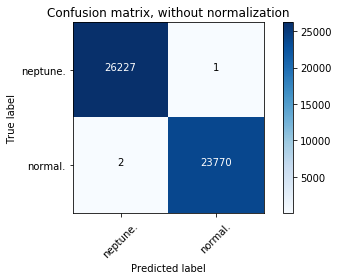

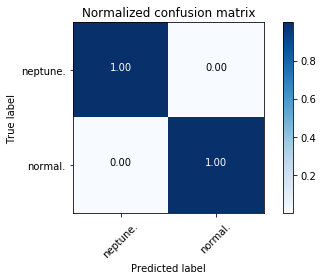

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=attack_labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=attack_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
#print(type(X))
#print(X[0],Y[0])


sample = numpy.loadtxt("GANresults.txt")
predicted = estimator.predict(sample)#,batch_size=0)
print(predicted)


[1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0]
